In [3]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


In [11]:
import pandas as pd
import os
from pandas.plotting import table
from config.definitions import ROOT_DIR
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML, display

In [7]:
df = pd.read_csv(os.path.join(ROOT_DIR, 'data','raw', '2018.csv'))

In [9]:
df2 = df.drop(['CANCELLATION_CODE','CANCELLED','DIVERTED','Unnamed: 27'], axis=1)

#Drop all rows with NA
df2 = df2.dropna()

In [30]:
#Getting summary statistics
delay_data = []

labels = ['Delay Type','Max Delay','Min Delay','Mean','Standard Deviation','Median']
delay_type =['DEP_DELAY','ARR_DELAY','CARRIER_DELAY','WEATHER_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']
delay_type2 =['Departure Delay','Arrival Delay','Carrier Delay','Weather Delay','Security Delay','Late Aircraft Delay']
delay_data.append(labels)


for data in delay_type:
    temp_list = []
    temp_list.append(delay_type2[delay_type.index(data)])
    temp_list.append(df2[data].max())
    temp_list.append(df2[data].min())
    temp_list.append("{0:.2f}".format(df2[data].mean()))
    temp_list.append("{0:.2f}".format(df2[data].std()))
    temp_list.append(df2[data].median())
    delay_data.append(temp_list)

display(HTML('<table><tr>{}</tr></table>'.format('</tr><tr>'.join('<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in delay_data))))    

#save data as html file
df_delaydata = pd.DataFrame(delay_data[1:],columns = delay_data[0])

html = df_delaydata.to_html()
text_file = open('delay_data.html',"w")
text_file.write(html)
text_file.close()

Delay Type,Max Delay,Min Delay,Mean,Standard Deviation,Median
Departure Delay,2710.0,-47.0,59.92,84.23,38.0
Arrival Delay,2692.0,15.0,64.72,81.18,39.0
Carrier Delay,2109.0,0.0,19.46,58.91,0.0
Weather Delay,2692.0,0.0,3.64,30.00,0.0
Security Delay,987.0,0.0,0.09,3.17,0.0
Late Aircraft Delay,2454.0,0.0,25.65,49.79,3.0


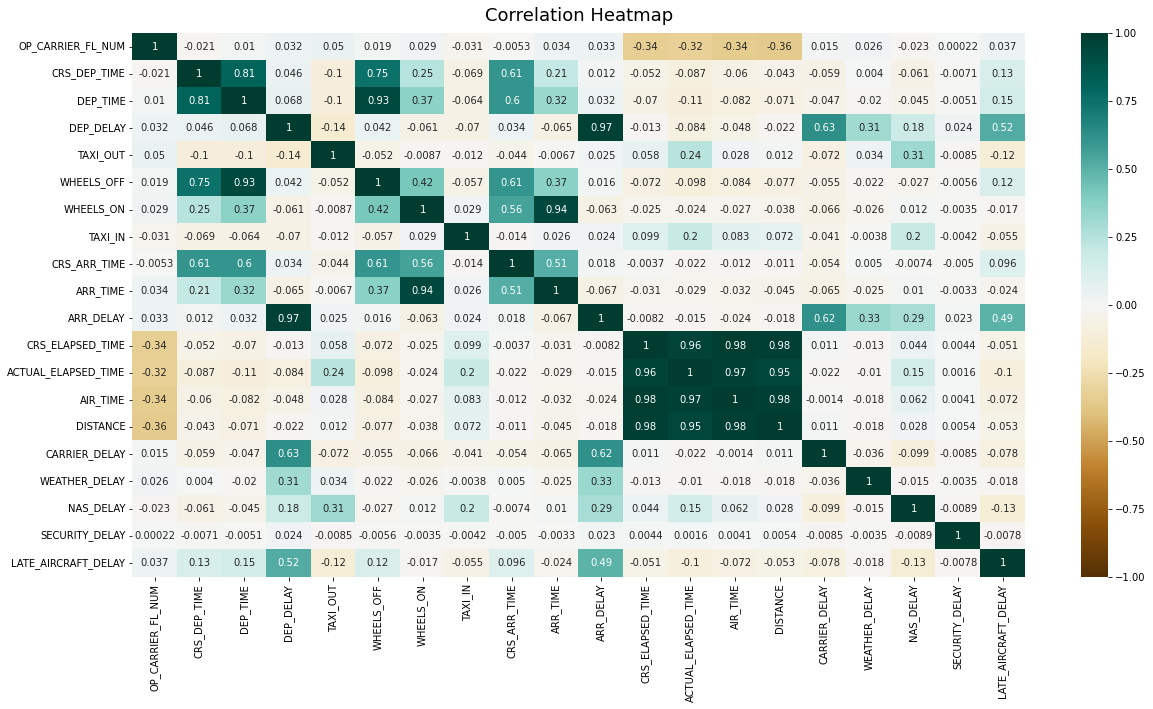

In [34]:
# Size of the heatmap.
plt.figure(figsize=(20, 10))

heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('corr_heatmap.png', dpi=300, bbox_inches='tight')